# DQN for Ms Pacman

TLDR: 

## Table of Content

## Imports

In [1]:
import collections
import random
import time
import warnings

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

from src.DQN import DQN
from src.utils import preprocess_state

# for windows
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# for mac
device = torch.device(
    "mps"
    if torch.backends.mps.is_available() and torch.backends.mps.is_built()
    else "cpu"
)

warnings.simplefilter("ignore")

## Environment

In [2]:
ENV_NAME = "ALE/MsPacman-v5"
env = gym.make(ENV_NAME, render_mode="rgb_array")

print("Observation Space: ", env.observation_space)
print("Action Space: ", env.action_space)
print("Actions: ", env.get_action_meanings())

Observation Space:  Box(0, 255, (210, 160, 3), uint8)
Action Space:  Discrete(9)
Actions:  ['NOOP', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'UPRIGHT', 'UPLEFT', 'DOWNRIGHT', 'DOWNLEFT']


A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [4]:
obs, info = env.reset()

fig, axes = plt.subplots(figsize=(10, 10), nrows=1, ncols=5)
for i in range(5):
    obs, reward, done, trunc, info = env.step(env.action_space.sample())
    obs = preprocess_state(obs)

    axes[i].imshow(obs)
    axes[i].axis("off")


env.close()

Observation Space:  Box(0, 255, (210, 160, 3), uint8)
Action Space:  Discrete(9)
Actions:  ['NOOP', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'UPRIGHT', 'UPLEFT', 'DOWNRIGHT', 'DOWNLEFT']


## Train Agent

### Set Parameter

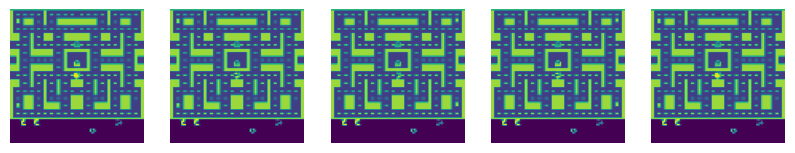

In [5]:
GAMMA = 0.99
EPSILON_START = 1.0
EPSILON_END = 0.01
EPSILON_DECAY = 1000
LEARNING_RATE = 1e-4
REPLAY_SIZE = 10000
BATCH_SIZE = 64
TARGET_UPDATE = 10
N_EPISODES = 2
N_STACKED_FRAMES = 4
MAX_STEPS_PER_EPISODE = 10

INPUT_SHAPE = (4, 84, 84)